In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Loading DataSet

In [30]:
heart = pd.read_csv('../DataSets/heartdata.csv')

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Heart Disease DataSet Attribute Details
1. age
2. sex (1= male; 0=female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)
14. target (0 = no heart disease; 1 = heart disease)

Modification of Attributes Name

In [12]:
heart = heart.rename(columns={"cp": "chest_pain", "trestbps": "blood_pressure", "fbs": "blood_sugar", "ca": "vessels", "chol": "cholesterol"})
heart['health_status'] = heart['target']
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]
heart['gender'] = heart['sex']
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [13]:
heart.head(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,sick,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,sick,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,sick,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,sick,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,sick,F
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,sick,M
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,sick,F
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,sick,M
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,sick,M
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,sick,M


In [14]:
heart.tail(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,healthy,M
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0,healthy,M
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,healthy,M
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,healthy,F
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0,healthy,M
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,healthy,F
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,healthy,M
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,healthy,M
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,healthy,M
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,healthy,F


Dataset Count

In [15]:
heart.shape

(303, 16)

Checking Duplicate Value

In [16]:
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M


Removing Duplicate Values from dataset

In [17]:
heart = heart.drop_duplicates(keep='first')

Health Status Count

In [19]:
heart['health_status'].value_counts()

sick       164
healthy    138
Name: health_status, dtype: int64

Pictorial View of Each Attributes

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'blood_sugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

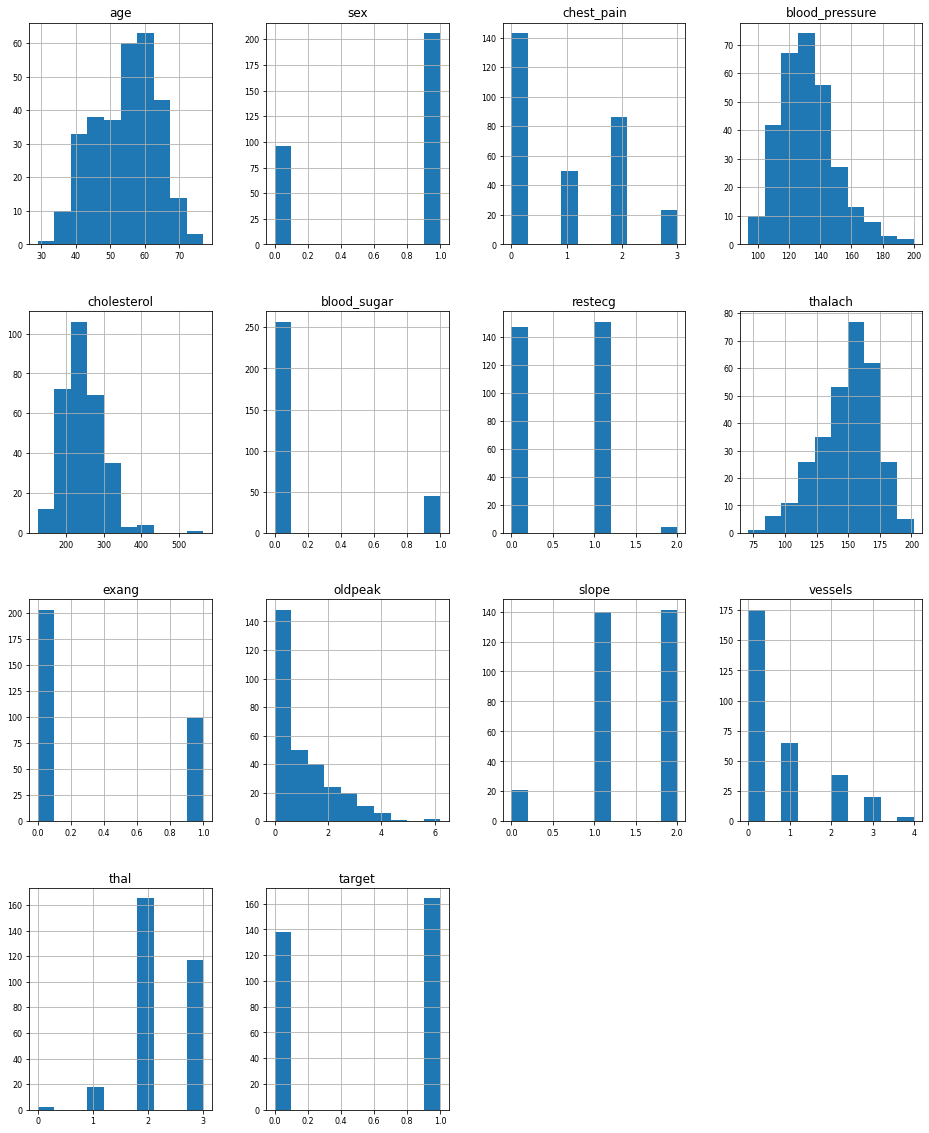

In [20]:
heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

Top Correlated Features of Dataset

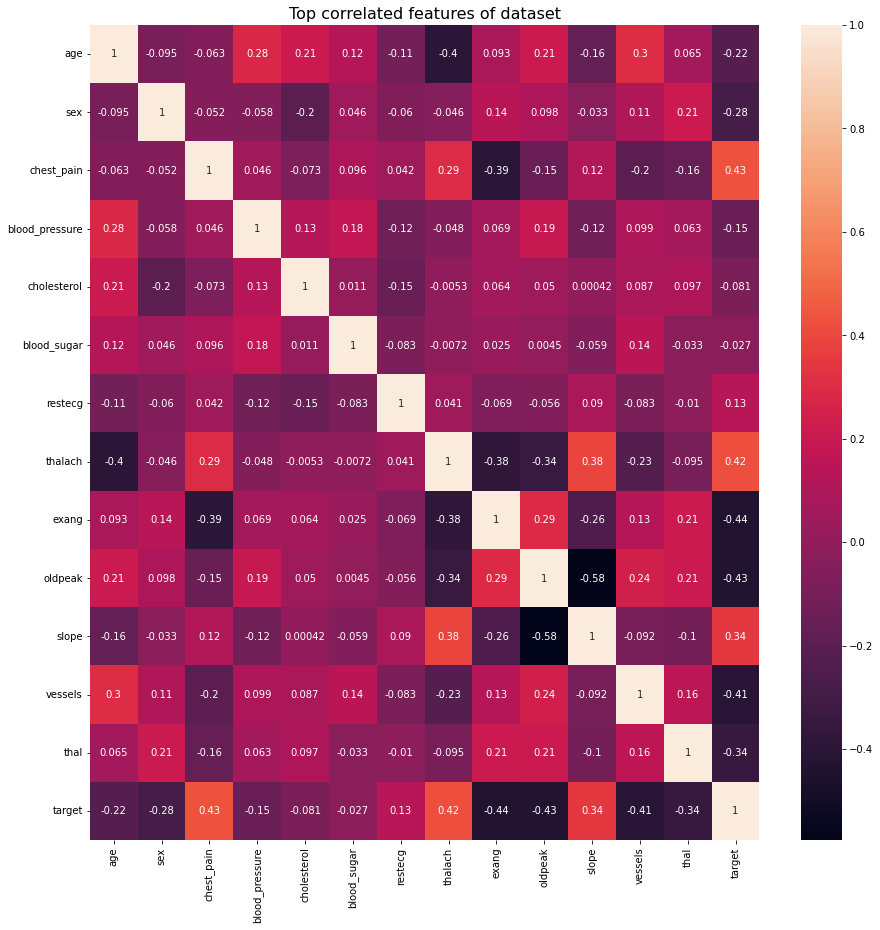

In [22]:
plt.figure(figsize = (15,15))
sns.heatmap(heart.corr(), annot = True)
plt.title('Top correlated features of dataset', size=16)
plt.show()

Age Analysis

In [23]:
heart['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [25]:
heart['age'].mean()

54.420529801324506

<AxesSubplot:xlabel='age', ylabel='Density'>

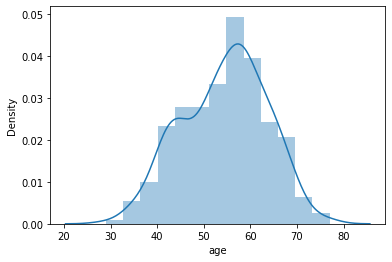

In [24]:
sns.distplot(heart['age'])

In [29]:
heart['age'].corr(heart['target'])

-0.2214758277665619

Gender Analysis

In [26]:
heart['gender'].value_counts()

M    206
F     96
Name: gender, dtype: int64

In [27]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
F       healthy           24
        sick              72
M       healthy          114
        sick              92
Name: gender, dtype: int64

In [28]:
heart['sex'].corr(heart['target'])

-0.2836093577958621